# Support Vector Machines

In this lab, an example of applying the Support Vector Machines (SVM) for classification is presented.

Some of the content in this lab tutorial is taken from the:
1. Datacamp's SVM tutorial by Avinash Navlani (https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python) and 
2. Kaggle's SVM on iris flower dataset (https://www.kaggle.com/arshid/support-vector-machine-on-iris-flower-dataset)

The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset:

    Iris-setosa (n=50)
    Iris-versicolor (n=50)
    Iris-virginica (n=50)

The four features of the Iris dataset:

    sepal length in cm
    sepal width in cm
    petal length in cm
    petal width in cm

In [1]:
# Load libraries
from sklearn import svm
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Load data with only two classes and two features
iris = datasets.load_iris()

In [3]:
# Print the features and target
print(type(iris))
print('Features: ', iris.feature_names)
print('Labels: ', iris.target_names)

<class 'sklearn.utils.Bunch'>
Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Labels:  ['setosa' 'versicolor' 'virginica']


In [4]:
# Size of the data
print(iris.data.shape)

# Check if any of the attribute has a nan value.
np.isnan(iris.data)

(150, 4)


array([[False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
 

### Plot the data

In most cases, we would like first to see the data plot. This could provide more insights on the data, before further analysis takes place. We will use the seaborn pairplot to visualise the data, to see the similarities or differences between classes. First we need to convert the data to pandas Dataframe.

In [5]:
data1 = pd.DataFrame(iris['data'], columns=iris['feature_names'])
data1['species'] = iris['target']
data1.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
# The lambda function is used to apply a function to convert the target values which 
# are 0,1,2 to the corresponding target values(“setosa”,”versicolor”,”virginica”) 
# for better understanding.
data1['species'] = data1['species'].apply(lambda x:iris['target_names'][x])
data1.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


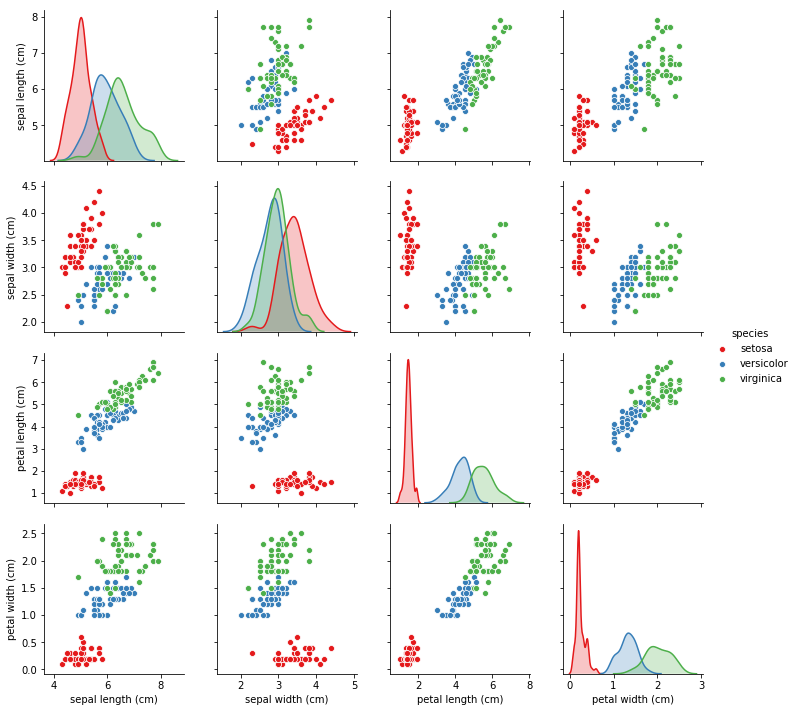

In [7]:
# Creating a pairplot to visualize the similarities and especially difference between the species
sns.pairplot(data=data1, hue='species', palette='Set1')

### Train-test split

Next, we split the data to training and test sets.

The training set will be used to generate the model (SVM will learn pattern of Iris dataset using this training set).

The test set will be used to evaluate how good the generated model is in distinguishing different types of Iris flowers.

In this example, we set 20% of the data as test set.

In [8]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set, 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

### Training the model

In [12]:
# Create support vector classifier
clf = svm.SVC(kernel='rbf')

# Train model
clf.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### Test the model

In [13]:
y_pred = clf.predict(X_test)

Get the accuracy of the prediction. Accuracy can be computed by comparing the predicted label and the actual label of the test data. We also would like to see which label is correctly predicted, and which is not. We can use the confusion matrix to see this.

In [14]:
y_pred

array([1, 2, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 0, 2, 2, 0, 1, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 1, 1, 1])

In [15]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# The classification confusion matrix
cm = np.array(metrics.confusion_matrix(y_test, y_pred))
confusion = pd.DataFrame(cm, index=['is_setosa','is_versicolor','is_virginica'],
                        columns=['pred_setosa','pred_versicolor','pred_virginica'])
print(confusion)
# Model Accuracy: how often is the classifier correct?
print("Accuracy: %.2f" % metrics.accuracy_score(y_test, y_pred))

               pred_setosa  pred_versicolor  pred_virginica
is_setosa                8                0               0
is_versicolor            0                9               1
is_virginica             0                0              12
Accuracy: 0.97


The results of the classification can be seen above. The results will change when you rerun the code, as the train and test data are selected randomly.

## Tuning parameters

Kernel: The main function of the kernel is to transform the given dataset input data into the required form. There are various types of functions such as linear, polynomial, and radial basis function (RBF). Polynomial and RBF are useful for non-linear hyperplane. Polynomial and RBF kernels compute the separation line in the higher dimension. In some of the applications, it is suggested to use a more complex kernel to separate the classes that are curved or nonlinear. This transformation can lead to more accurate classifiers.

Regularization: Regularization parameter in python's Scikit-learn C parameter used to maintain regularization. Here C is the penalty parameter, which represents misclassification or error term. The misclassification or error term tells the SVM optimization how much error is bearable. This is how you can control the trade-off between decision boundary and misclassification term. A smaller value of C creates a small-margin hyperplane and a larger value of C creates a larger-margin hyperplane.

Gamma: A lower value of Gamma will loosely fit the training dataset, whereas a higher value of gamma will exactly fit the training dataset, which causes over-fitting. In other words, you can say a low value of gamma considers only nearby points in calculating the separation line, while the a value of gamma considers all the data points in the calculation of the separation line.

You may change the parameters of the classifier above and identify which paramater setting produced the best accuracy.
